# Armed conflicts 2018 - Data analysis

This workbook analyzes the armed conflicts in the world

**Background for the project:**
In this project we are looking at UCDP’s covering of individual events of organized violence. The organized violence is defined as phenomena of lethal violence occurring at a given time and place. 
These events are fine-grained to be geo-coded down to the level of individual villages with temporal duration disaggregated to single, individual days. 

**The structuring:**
Because of the very large dataset, we have chosen to drop some of the variables. This wasn’t enough, therefore we have decided only to use “2018” as our year of analysis. 
Because of a lot of armed conflicts in Afghanistan, Afghanistan was split into 5 different coordinates, that we have summed up to 1. 

Furthermore we had a lot of armed conflicts in Afghanistan, and we have therefore choosen to remove “Afghanistan” from the bar chart. This gives us a better insight of the armed conflicts in the rest of the world. 

**Data analysis:** 
In this workbook we have analyzed the data generated in link til projekt by:

- Makeing a barplot to analyze with continent where most armed conflicts occur
- Makeing a barplot to analyze whick countries have the most armed conflicts
- Makeing a map to analyze the degree of armed conflicts


In [28]:
import os
import numpy as np
import pandas as pd
from datetime import datetime


import matplotlib.pyplot as plt
import geopandas as gpd
import json

from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, ColumnDataSource
from bokeh.models import HoverTool

#cw = pd.read_csv('ged191.csv')


#Drop unwanted columns 

#drop_these = ['id','low', 'high', 'event_clarity', 'date_prec', 'conflict_new_id',  'conflict_name','dyad_name', 'dyad_new_id','side_a_new_id','adm_1','adm_2', 'gwnoa', 'side_b_new_id', 'dyad_new_id', 'gwnob', 'number_of_sources', 'source_headline', 'priogrid_gid', 'source_date', 'source_office', 'source_article', 'source_original', 'deaths_a', 'deaths_b', 'deaths_civilians', 'deaths_unknown', 'date_start', 'date_end', 'country_id', 'side_a', 'side_b', 'where_prec', 'type_of_violence', 'active_year']


#cw.drop(drop_these, axis=1, inplace=True) # axis = 1 -> columns, inplace=True -> changed, no copy made

# We first look at the latest year, which is 2018. 
#cw_year = cw[cw.year == 2018]
# Since our datafile was too large we first dorpped the columns above from the file 'ged191' and then we exported it as a new datafile 'export_dataframe.csv'
#cw_year.to_csv (r'C:\Users\Frede\Desktop\Polit\export_dataframe.csv', index = False, header=True)

# We now read our files

cw_year = pd.read_csv('export_dataframe.csv')
world = 'countries/ne_110m_admin_0_countries.shp'

In [29]:
# We create dummies for the regions:
region_dummy = pd.get_dummies(cw_year['region'])
# Merge the two dataframess:
cw_year = pd.concat([cw_year, region_dummy], axis=1)
cw_year.head()


,year,where_coordinates,latitude,longitude,geom_wkt,country,region,best,Africa,Americas,Asia,Europe,Middle East
0,2018,Qush Tepa district,36.193552,65.352724,POINT (65.352724 36.193552),Afghanistan,Asia,45,0,0,1,0,0
1,2018,Imam Sahib district,37.105713,68.851658,POINT (68.851658 37.105713),Afghanistan,Asia,28,0,0,1,0,0
2,2018,Bala Bagh village,34.389900,70.227900,POINT (70.227900 34.389900),Afghanistan,Asia,7,0,0,1,0,0
3,2018,Khaki Safed district,32.755167,62.073124,POINT (62.073124 32.755167),Afghanistan,Asia,23,0,0,1,0,0
4,2018,Khwaja Sabz Posh district,36.055429,64.978235,POINT (64.978235 36.055429),Afghanistan,Asia,16,0,0,1,0,0


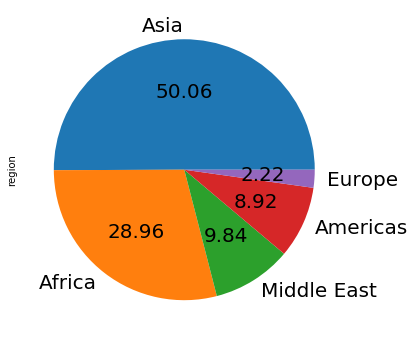

In [30]:
#We plot the different regions in a pie plot, and calculate the percentage. 

Regions = cw_year['region'].value_counts().plot.pie( autopct='%.2f', fontsize=20, figsize=(6, 6))




In [31]:
# We group the armed conflicts by country:
grouped = cw_year.groupby('country')

cw_year_count = grouped.count()
cw_year_grouped = grouped.sum()

# We now count how may armed conflicts there have been in the year per country.
cw_year_grouped['Armed_conflicts'] = cw_year_count['best']
cw_year_grouped.reset_index(inplace=True)

# Remove Afghanistan from the list
cw_year_grouped = cw_year_grouped[cw_year_grouped['country'] != 'Afghanistan']
cw_year_grouped.reset_index(inplace=True)

cw_year_grouped.head(5)

,index,country,year,latitude,longitude,best,Africa,Americas,Asia,Europe,Middle East,Armed_conflicts
0,1,Algeria,20180,348.247775,45.884229,35,10.0,0.0,0.0,0.0,0.0,10
1,2,Angola,12108,-47.908549,101.475650,24,6.0,0.0,0.0,0.0,0.0,6
2,3,Armenia,2018,40.854687,45.577810,1,0.0,0.0,0.0,1.0,0.0,1
3,4,Australia,4036,-75.627222,289.926112,2,0.0,0.0,2.0,0.0,0.0,2
4,5,Azerbaijan,34306,680.044400,795.137964,16,0.0,0.0,0.0,17.0,0.0,17


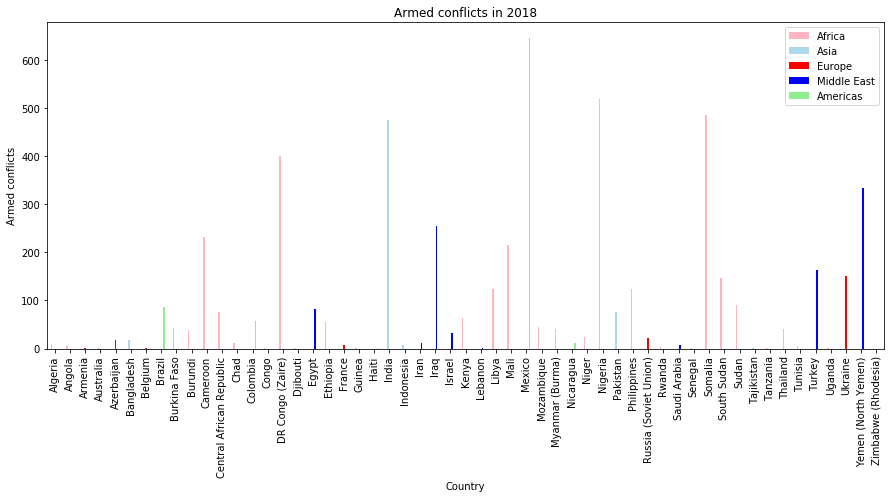

In [32]:
fig, ax = plt.subplots(figsize = (15,6))
fig = cw_year_grouped.plot(x="country", y=["Africa" , "Asia", "Europe", "Middle East", "Americas"], kind="bar", color=['lightpink', 'lightblue', 'red' , 'blue', 'lightgreen'], width=0.5, ax=ax,)

x = cw_year_grouped['country']

plt.title('Armed conflicts in 2018')
plt.ylabel('Armed conflicts')
plt.xlabel('Country')

plt.show()

In [33]:
#We now start making the map
#We read our file and we only want the two columns 'Admin' and 'geometry'
gdf = gpd.read_file("Countries/ne_110m_admin_0_countries.shp")[["ADMIN", "geometry"]]

#Rename columns.
gdf.columns = ['country', 'geometry']


# We drop Antarctica, as we won't have data for that.
print(gdf[gdf['country'] == 'Antarctica'])
#Drop row corresponding to 'Antarctica'
gdf = gdf.drop(gdf.index[159])

#Read data to json.
cw_year_grouped_json = json.loads(cw_year_grouped.to_json())
#Convert to String like object.
json_data = json.dumps(cw_year_grouped_json)

country                                           geometry
159  Antarctica  MULTIPOLYGON (((-48.66062 -78.04702, -48.15140...


In [47]:
# join the geodataframe with the csv dataframe
merged = gdf.merge(cw_year_grouped, how='left', left_on="country", right_on="country")
merged = merged[['country', 'geometry', 'best' ]]
merged1 = merged.merge(cw_year_grouped, how='left', left_on="country", right_on="country")

merged1.head()
merged1.info()

merged1.head()


<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 176 entries, 0 to 175
Data columns (total 14 columns):
country            176 non-null object
geometry           176 non-null geometry
best_x             48 non-null float64
index              48 non-null float64
year               48 non-null float64
latitude           48 non-null float64
longitude          48 non-null float64
best_y             48 non-null float64
Africa             48 non-null float64
Americas           48 non-null float64
Asia               48 non-null float64
Europe             48 non-null float64
Middle East        48 non-null float64
Armed_conflicts    48 non-null float64
dtypes: float64(12), geometry(1), object(1)
memory usage: 20.6+ KB


,country,geometry,best_x,index,year,latitude,longitude,best_y,Africa,Americas,Asia,Europe,Middle East,Armed_conflicts
0,Fiji,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,United Republic of Tanzania,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Western Sahara,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Canada,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United States of America,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:

#Read data to json
merged1_json = json.loads(merged1.to_json())

#Convert to str like object
json_data = json.dumps(merged1_json)

#Read data to json.
gdf_json = json.loads(merged1.to_json())
#Convert to String like object.
grid = json.dumps(merged1_json)



In [49]:
#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = grid)
pointsource = ColumnDataSource(merged1)

#Create figure object.
p = figure(title = 'Armed conflicts in 2018', plot_height = 600 , plot_width = 1050)
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
#Add patch renderer to figure. 
patch=p.patches('xs','ys', source = geosource,fill_color = '#9dbdf2',
          line_color = 'black', line_width = 0.35, fill_alpha = 1, 
                hover_fill_color="#eccbf5")


p.add_tools(HoverTool(tooltips=[('Country','@country'),('Deaths','@best_x'), ('Armed conflicts', '@Armed_conflicts')], renderers=[patch]))

#Display figure.
show(p)

In [51]:
fig, ax = plt.subplots(figsize = (15,6))
merged1.plot(column='Armed_conflicts', cmap='OrRd',ax=ax, legend=True, missing_kwds={"color": "lightgrey", "edgecolor": "red", "hatch": "///", "label": "Missing values"})

AttributeError: 'PatchCollection' object has no property 'missing_kwds'